In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad


##### leitura do dataframe e remover os NaN

In [100]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df = df[df['bmi'].notna()]

# Árvore

### Sem Poda do DATAFRAME

##### df de features e df de outcomes

In [101]:
df_features = df[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
df_features = pd.get_dummies(df_features)
df_outcome = df[['stroke']]
df_outcome = df_outcome.replace(0,-1)
df_outcome = pd.get_dummies(df_outcome)

##### df de treino e df de teste

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_outcome, train_size=0.5)

##### montando o predidor de árvore e estimando valores

In [103]:
tree = DecisionTreeClassifier(criterion='entropy')
tree = tree.fit(X_train, y_train)

y_estimado = tree.predict(X_test)

##### calculando a acurácia do nosso predidor

In [104]:
accur = accuracy_score(y_estimado,y_test)
accur

0.9258655804480652

##### hipotese nula (acurácia de um predidor que só chuta -1 (sem stroke))

In [105]:
y_so_0 = np.array([-1 for i in range(len(y_estimado))])
accur_0 = accuracy_score(y_so_0,y_test)
accur_0

0.9547861507128309

##### árvore sem poda

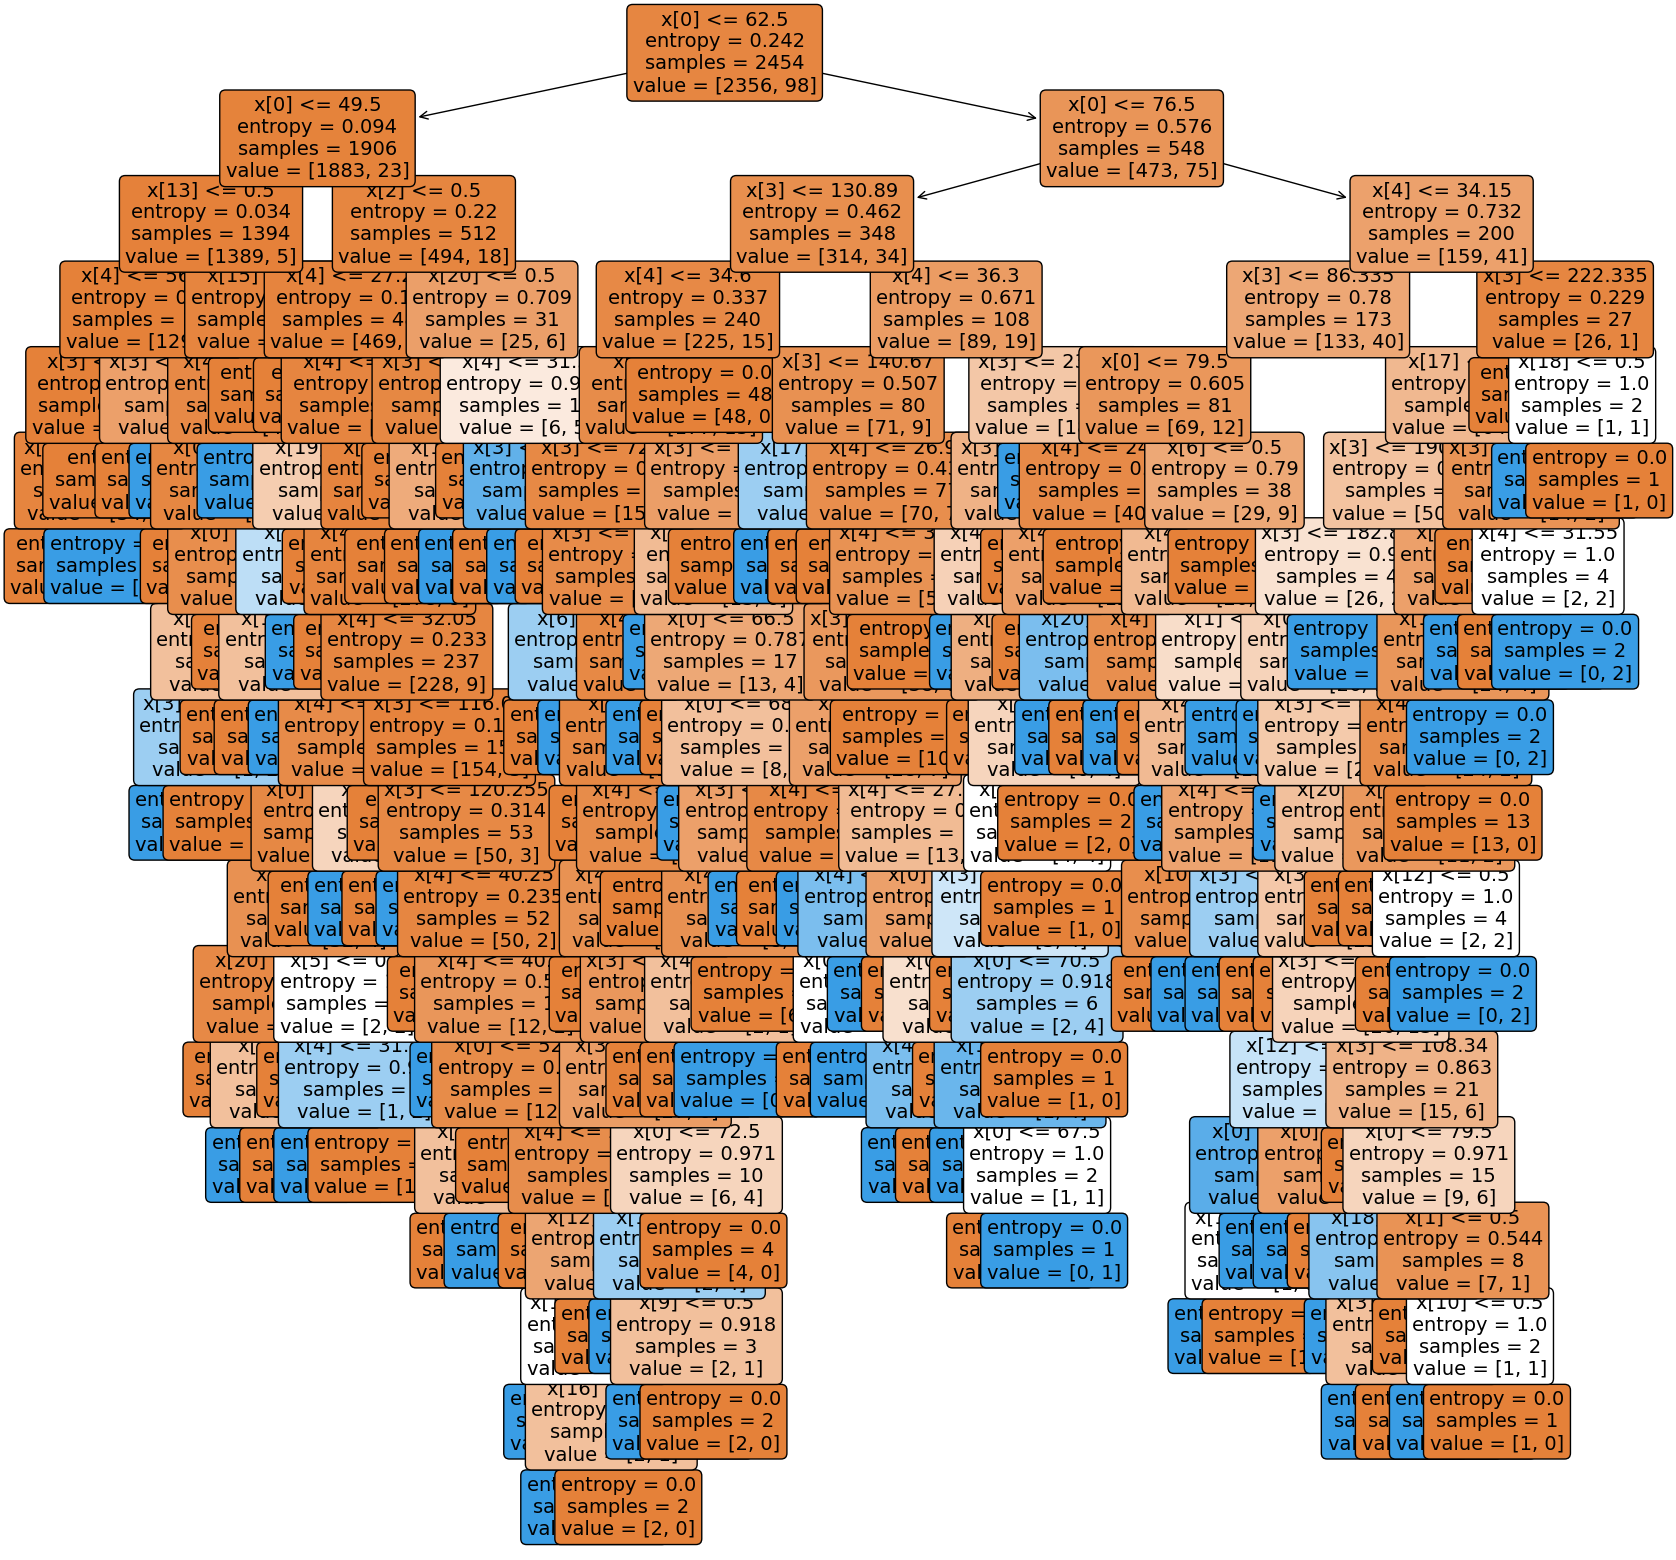

In [106]:
plt.figure(figsize=(20, 20))
plot_tree(tree, filled=True, rounded=True, fontsize=14)
plt.show()

### Com poda do DATAFRAME (balancemaento de dados para strokes e para não strokes)

##### podando o dataframe (dx mesma qntd de dados de avc e não avc)

In [107]:
df_p = pd.concat([df[df['stroke'] == 0].head(len(df[df['stroke'] == 1])), df[df['stroke'] == 1]])

##### df de features e df de outcomes

In [108]:
df_features = df_p[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
df_features = pd.get_dummies(df_features)
df_outcome = df_p[['stroke']].replace(0,-1)
df_outcome = pd.get_dummies(df_outcome)

##### df de treino e df de teste

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_outcome, train_size=0.5)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

##### montando o predidor de árvore e estimando valores

In [110]:
tree = DecisionTreeClassifier(criterion='entropy')
tree = tree.fit(X_train, y_train)

y_estimado = tree.predict(X_test)

##### calculando a acurácia do nosso predidor com poda

In [111]:
accur = accuracy_score(y_estimado,y_test)
accur

0.6650717703349283

##### hipotese nula (acurácia de um predidor que só chuta -1 (sem stroke))

In [112]:
y_so_0 = np.array([-1 for i in range(len(y_estimado))])
accur_0 = accuracy_score(y_so_0,y_test)
accur_0

0.5119617224880383

# Linear

In [113]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df = df[df['bmi'].notna()]
df = pd.concat([df[df['stroke'] == 0].head(len(df[df['stroke'] == 1])), df[df['stroke'] == 1]])

df_features = df[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
df_features = pd.get_dummies(df_features)
df_outcome = df[['stroke']]
df_outcome = df_outcome.replace(0,-1)
df_outcome = pd.get_dummies(df_outcome)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_outcome, train_size=0.5)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [114]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

In [115]:

def loss(parametros):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean((est - val)**2)
    return mse

g = grad(loss)

X = (X_train.T).astype(float)
Y = y_train.astype(float)

w = np.random.randn(X.shape[0],1)
b = 0.5
alpha = 10**-5

for n in range(100):
    grad_ = g((w, b, X, Y))
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

y_est = w.T @ X_test.T + b
pred = accuracy(y_test, y_est)
pred

0.5056889723220622

In [116]:
X = pd.DataFrame(X)
mais_imp = []
for i in range(5):
    mais_imp.append(X.columns[np.argsort(w.T)[0][-i]])

colunas = list(df_features.head(0))

for i in range(5):
    print(colunas[mais_imp[i]])


ever_married_Yes
gender_Female
smoking_status_smokes
work_type_Private
smoking_status_formerly smoked
